In [4]:
import pandas as pd
import numpy as np
import os

BASE_DIR = "./data/raw"
train = pd.read_csv(os.path.join(BASE_DIR, 'train.csv'))
test = pd.read_csv(os.path.join(BASE_DIR, 'test.csv'))   

In [5]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [7]:
#Checking for any null/missing values in df
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [9]:
#Checking for any duplicate records in df
train[train.duplicated()]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [10]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
train['length']=train['comment_text'].apply(lambda x: len(str(x)))

In [12]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [13]:
import matplotlib.pyplot as plt

plt.hist(train['length'])

(array([126021.,  20285.,   6626.,   2605.,   1200.,    736.,    569.,
           490.,    397.,    642.]),
 array([   6. ,  505.4, 1004.8, 1504.2, 2003.6, 2503. , 3002.4, 3501.8,
        4001.2, 4500.6, 5000. ]),
 <a list of 10 Patch objects>)

In [14]:
train['length'].describe()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: length, dtype: float64

In [15]:
train.loc[train['obscene']==1].head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,648
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,40
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0,124
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,89


In [16]:
train.loc[train['identity_hate']==1].head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,648
105,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1,42
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1,128
218,008e0818dde894fb,"Kill all niggers. \n\nI have hard, that others...",1,0,1,0,1,1,120
238,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...,1,0,1,0,1,1,58


In [17]:
from wordcloud import WordCloud

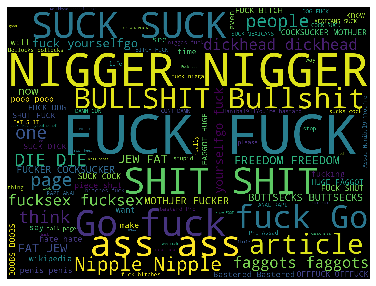

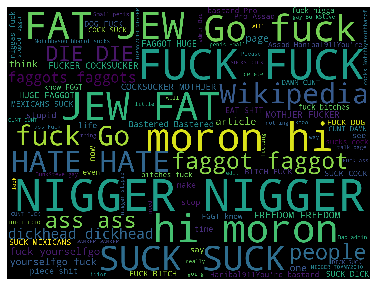

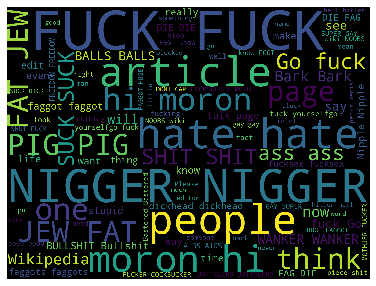

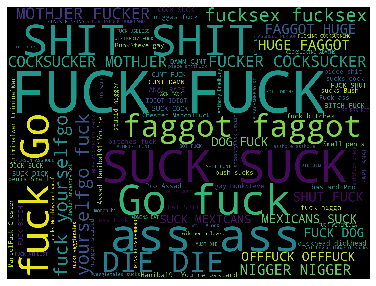

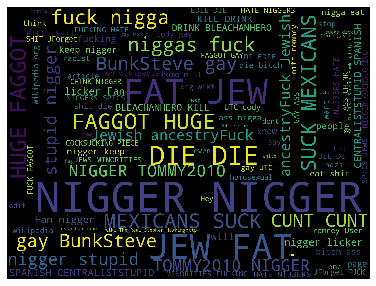

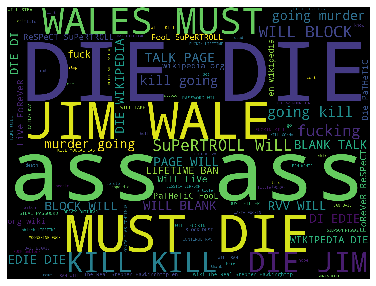

In [18]:
columns =['obscene','insult','toxic','severe_toxic','identity_hate','threat']

for col in columns:
    cloud = WordCloud(width=1440, height= 1080,max_words= 100).generate(' '.join(train['comment_text'].loc[train[col]==1].astype(str)))
    plt.figure(figsize=(10,5))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()


In [19]:
# Data Preprocessing - cleaning, normalization, tokenization, stemming, leammatization

import nltk 
import re
from nltk.tokenize import word_tokenize
from nltk.util import ngrams 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords


In [20]:
#Clean string function 

def clean_string(string):
    string = re.sub(r"[^A-Za-z0-9()!\'\`%$]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'t"," not",string)
    string = re.sub(r"\'m", " am", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " ( ", string)
    string = re.sub(r"\)", " ) ", string)
    string = re.sub(r"\%", " % ", string) 
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r'[^\x00-\x7F]+', "", string)
    string = re.sub("\n", " ", string)
    
    return string.strip().lower()

In [21]:
train['cleaned_comment']=train['comment_text'].apply(clean_string)

In [22]:
train[['comment_text','cleaned_comment']].head(5)


,comment_text,cleaned_comment
0,Explanation\nWhy the edits made under my usern...,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,d'aww ! he matches this background colour i am...
2,"Hey man, I'm really not trying to edit war. It...",hey man i am really not trying to edit war it ...
3,"""\nMore\nI can't make any real suggestions on ...",more i can not make any real suggestions on im...
4,"You, sir, are my hero. Any chance you remember...",you sir are my hero any chance you remember wh...


In [23]:
#Remove stop words

import nltk 
nltk.download('stopwords')


def remove_stopwords(text):
    english_stopwords = list(stopwords.words("english")) 
    
    words = text.split(' ')
    refined = [word for word in words if word not in english_stopwords]
    refined_words = " ".join(refined)
    return refined_words

[nltk_data] Downloading package stopwords to /home/purvi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
train['refined_comment']=train['cleaned_comment'].apply(remove_stopwords)

In [25]:
train[['comment_text','refined_comment']].head(5)

,comment_text,refined_comment
0,Explanation\nWhy the edits made under my usern...,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,d'aww ! matches background colour seemingly st...
2,"Hey man, I'm really not trying to edit war. It...",hey man really trying edit war 's guy constant...
3,"""\nMore\nI can't make any real suggestions on ...",make real suggestions improvement wondered sec...
4,"You, sir, are my hero. Any chance you remember...",sir hero chance remember page 's


In [26]:
train['tokenized'] = train['refined_comment'].apply(lambda x: word_tokenize(x))

In [27]:
train.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,cleaned_comment,refined_comment,tokenized
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,explanation why the edits made under my userna...,explanation edits made username hardcore metal...,"[explanation, edits, made, username, hardcore,..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,d'aww ! he matches this background colour i am...,d'aww ! matches background colour seemingly st...,"[d'aww, !, matches, background, colour, seemin..."


In [28]:
# POS Tagging (part of speech tagging - anotate a word with its grammatical category)

#Lemmatizing >>> stemming in this case  

lemm = WordNetLemmatizer()

train['lemmatized'] = train['tokenized'].apply(lambda tokens: ' '.join([lemm.lemmatize(word,'v') for word in tokens]))


In [29]:
train.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,cleaned_comment,refined_comment,tokenized,lemmatized
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,explanation why the edits made under my userna...,explanation edits made username hardcore metal...,"[explanation, edits, made, username, hardcore,...",explanation edit make username hardcore metall...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,d'aww ! he matches this background colour i am...,d'aww ! matches background colour seemingly st...,"[d'aww, !, matches, background, colour, seemin...",d'aww ! match background colour seemingly stic...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,hey man i am really not trying to edit war it ...,hey man really trying edit war 's guy constant...,"[hey, man, really, trying, edit, war, 's, guy,...",hey man really try edit war 's guy constantly ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,more i can not make any real suggestions on im...,make real suggestions improvement wondered sec...,"[make, real, suggestions, improvement, wondere...",make real suggestions improvement wonder secti...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,you sir are my hero any chance you remember wh...,sir hero chance remember page 's,"[sir, hero, chance, remember, page, 's]",sir hero chance remember page 's


In [30]:
#Feature extraction

#Will use TF-IDF to know the frequency of certain terms and how important a term is in a document
#Term Frequency - Inverse Document Frequency 
#TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
#IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

#tf idf = tf * idf

#What I need here is: term freq matrix and inverse doc matrix 
#N = total number of documents that is total number of comments we have 
#n = freq of that term in all documents 

# Matrix multiplication of both matrices


from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vector = TfidfVectorizer(max_features=5000)

In [32]:
x_train = train['lemmatized']
features = vector.fit(x_train)
x_train_dtm = vector.fit_transform(x_train) #calibrates your measurement so that training data and test data have a similar shape.


In [33]:
targets = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [34]:
#Model Training here on 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold,cross_val_score

In [36]:
model=LogisticRegression(C=12.0)
y = train['obscene']
model

LogisticRegression(C=12.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
model.fit(x_train_dtm,y)
y_pred_X = model.predict(x_train_dtm)

/home/purvi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred_X)
print(confusion_matrix)

[[150469    653]
 [  1990   6459]]


In [39]:
#Metric computation

from sklearn.metrics import classification_report
print(classification_report(y, y_pred_X))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    151122
           1       0.91      0.76      0.83      8449

    accuracy                           0.98    159571
   macro avg       0.95      0.88      0.91    159571
weighted avg       0.98      0.98      0.98    159571



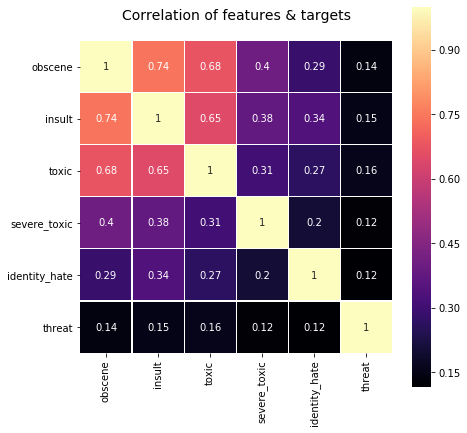

In [44]:


# Correlation Testing for Target Labels
import seaborn as sns

target_data = train[targets]

colormap = plt.cm.magma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(target_data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

